In [3]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from dateutil import parser
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import joblib
from sklearn.ensemble import IsolationForest
import seaborn as sns
from keras.models import load_model
from keras.losses import MeanAbsoluteError
from sklearn.metrics import mean_squared_error

In [2]:
df_train=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_minmax_df1.csv")
df_train

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-06-19 00:01:02,0.508197,1.000000,0.160656,0.922358,0.129904,8.137705e-13,0.0
1,2021-06-19 00:01:22,0.491803,1.000000,0.384741,0.913047,0.128160,8.137705e-13,0.0
2,2021-06-19 00:01:44,0.508197,1.000000,0.122764,0.919259,0.129032,8.137705e-13,0.0
3,2021-06-19 00:02:07,0.508197,1.000000,0.935694,0.900623,0.128160,8.137705e-13,0.0
4,2021-06-19 00:02:27,0.508197,1.000000,0.093913,0.909941,0.129032,8.137705e-13,0.0
...,...,...,...,...,...,...,...,...
69796,2021-08-10 04:02:46,0.196721,0.929293,0.174472,0.034165,0.727114,1.098970e-12,0.0
69797,2021-08-10 04:03:05,0.196721,0.939394,0.049393,0.034165,0.733217,1.140609e-12,0.0
69798,2021-08-10 04:03:25,0.196721,0.939394,0.179029,0.027954,0.733217,1.124848e-12,0.0
69799,2021-08-10 04:04:04,0.213115,0.939394,0.190994,0.034165,0.743679,7.781265e-13,0.0


In [3]:
df_test=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_test_minmax_df1.csv")
df_test

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-08-10 04:04:44,0.213115,0.939394,0.187534,0.027954,0.743679,8.349883e-13,0.0
1,2021-08-10 04:05:03,0.196721,0.939394,0.106389,0.027954,0.741935,9.811007e-13,0.0
2,2021-08-10 04:05:23,0.213115,0.929293,0.173815,0.027954,0.746295,1.053560e-12,0.0
3,2021-08-10 04:05:42,0.196721,0.939394,0.153370,0.040377,0.743679,8.061827e-13,0.0
4,2021-08-10 04:06:22,0.196721,0.939394,0.168819,0.037271,0.742807,8.308197e-13,0.0
...,...,...,...,...,...,...,...,...
29911,2021-10-13 02:48:31,0.934426,1.000000,0.010551,-3.096264,0.785527,1.358754e-11,0.0
29912,2021-10-13 03:17:36,0.934426,1.000000,0.024660,-3.018629,0.819529,9.609368e-12,0.0
29913,2021-10-13 03:46:49,0.918033,1.000000,0.020566,-3.173906,0.800349,1.891754e-11,0.0
29914,2021-10-13 04:13:23,0.885246,1.000000,0.117988,-3.195648,0.783784,2.462101e-11,0.0


In [4]:
print(df_train.columns)
print(df_test.columns)

Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')
Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')


In [5]:
df_train.describe()

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
count,69801.000000,69801.000000,69801.000000,69801.000000,69801.000000,6.980100e+04,69801.000000
mean,0.455154,0.857437,0.356856,0.388360,0.249736,6.059098e-04,0.065816
std,0.154922,0.282472,0.310341,0.277533,0.217477,2.009562e-02,0.247961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.360656,0.857437,0.116356,0.152178,0.086312,8.137705e-13,0.000000
50%,0.442623,1.000000,0.242824,0.316773,0.129032,5.201171e-12,0.000000
75%,0.524590,1.000000,0.502948,0.552798,0.340889,4.689419e-10,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


In [6]:
print(df_train.shape)
print(df_test.shape)

(69801, 8)
(29916, 8)


### Feature Selection

In [7]:
import numpy as np

# Select the features based on the analysis
selected_features = [
    'Temperature', 
    'Turbidity', 
    'Dissolved_Oxygen', 
    'pH', 
    'Nitrate'
]

X_train = df_train[selected_features]
X_test = df_test[selected_features]
# Convert DataFrame to NumPy array
X_train_np = X_train.values
X_test_np = X_test.values

# Verify the conversion
print(f"Shape of the data after converting to numpy array: {X_train_np.shape}")
print(f"Shape of the data after converting to numpy array: {X_test_np.shape}")

Shape of the data after converting to numpy array: (69801, 5)
Shape of the data after converting to numpy array: (29916, 5)


### Preparing Data for LSTM Autoencoder

LSTM models require data in a specific 3D shape: (samples, time_steps, features). We need to reshape our dataset accordingly.

In [8]:
# Assuming you want sequences with a certain number of time steps
time_steps = 10  # Adjust this based on your specific needs

# Reshape data to 3D array [number of sequences, time steps, features]
X_train_lstm = np.array([X_train_np[i:i+time_steps] for i in range(len(X_train_np) - time_steps + 1)])
X_test_lstm = np.array([X_test_np[i:i+time_steps] for i in range(len(X_test_np) - time_steps + 1)])

# Verify the shape
print(f"Shape of the dataset after reshaping: {X_train_lstm.shape}")
print(f"Shape of the dataset after reshaping: {X_test_lstm.shape}")

Shape of the dataset after reshaping: (69792, 10, 5)
Shape of the dataset after reshaping: (29907, 10, 5)


### Convert Boolean and Integer Values to Floats

In [9]:
# Function to convert mixed types to floats
def convert_to_float(value):
    if isinstance(value, bool):
        return float(value)
    elif isinstance(value, (int, float)):
        return float(value)
    else:
        return value

# Apply the conversion function
X_train_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_train_lstm], dtype=np.float32)
X_test_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_test_lstm], dtype=np.float32)

# Verify the conversion
print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_train_lstm[:1]}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_test_lstm[:1]}")

Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.5081967  1.         0.16065598 0.92235804 0.12990409]
  [0.4918033  1.         0.38474098 0.9130471  0.12816042]
  [0.5081967  1.         0.12276427 0.91925895 0.12903225]
  [0.5081967  1.         0.93569374 0.90062326 0.12816042]
  [0.5081967  1.         0.09391296 0.9099411  0.12903225]
  [0.4918033  1.         0.0687899  0.92235804 0.12990409]
  [0.5081967  1.         0.12193577 0.916153   0.12903225]
  [0.5081967  1.         0.07086115 0.916153   0.12816042]
  [0.4918033  1.         0.4141771  0.91925895 0.12816042]
  [0.4918033  1.         0.16950144 0.9534176  0.12728858]]]
Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.21311475 0.93939394 0.18753351 0.02795356 0.74367917]
  [0.19672132 0.93939394 0.1063892  0.02795356 0.7419355 ]
  [0.21311475 0.9292929  0.17381452 0.02795356 0.7462947 ]
  [0.19672132 0.93939394 0.1533

In [10]:
# Verify the data type conversion without reshaping
X_train_lstm = X_train_lstm.astype(np.float32)
X_test_lstm = X_test_lstm.astype(np.float32)

# Verify the conversion
print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Shape of the dataset after conversion: {X_train_lstm.shape}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Shape of the dataset after conversion: {X_test_lstm.shape}")

Data types in the dataset after conversion: float32
Shape of the dataset after conversion: (69792, 10, 5)
Data types in the dataset after conversion: float32
Shape of the dataset after conversion: (29907, 10, 5)


In [11]:
# Verify that all elements are now of type float32
assert X_train_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

assert X_test_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

All data is now of type float32.
All data is now of type float32.


### Building the LSTM Autoencoder Model

Now we’ll build the LSTM Autoencoder. The encoder will learn to compress the input data, and the decoder will attempt to reconstruct it.

### LSTM model with autoencoder

In [12]:
# Define the LSTM autoencoder model
model_lstm = Sequential()

# Encoder: LSTM layers
model_lstm.add(LSTM(256, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(128, activation='relu', return_sequences=False))
model_lstm.add(Dropout(0.3))

# Bottleneck: Repeat the encoded output to match the original sequence length
model_lstm.add(RepeatVector(X_train_lstm.shape[1]))

# Decoder: LSTM layers
model_lstm.add(LSTM(128, activation='relu', return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(256, activation='relu', return_sequences=True))
model_lstm.add(Dropout(0.3 ))

# Output layer: Reconstruct the original sequence
model_lstm.add(TimeDistributed(Dense(X_train_lstm.shape[2])))

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Summary of the model
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 256)        │       268,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 5)          │         1,285 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 992,517 (3.79 MB)

 Trainable params: 992,517 (3.79 MB)

 Non-trainable params: 0 (0.00 B)

### Training the LSTM Autoencoder

We’ll now train the autoencoder using the training data:

In [13]:
# Train the model
history_lstm = model_lstm.fit(X_train_lstm, X_train_lstm, epochs=20, batch_size=64, validation_split=0.1, shuffle=False)


Epoch 1/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - loss: 0.1188 - val_loss: 0.1693
Epoch 2/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 96s 98ms/step - loss: 0.1226 - val_loss: 0.1746
Epoch 3/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 102s 104ms/step - loss: 0.1171 - val_loss: 0.1716
Epoch 4/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 108s 110ms/step - loss: 0.1177 - val_loss: 0.1766
Epoch 5/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 109s 111ms/step - loss: 0.1102 - val_loss: 0.1767
Epoch 6/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 106s 108ms/step - loss: 0.1101 - val_loss: 0.1688
Epoch 7/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 107s 109ms/step - loss: 0.1071 - val_loss: 0.1930
Epoch 8/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 106s 108ms/step - loss: 0.1138 - val_loss: 0.1908
Epoch 9/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 105s 107ms/step - loss: 0.1090 - val_loss: 0.1846
Epoch 10/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 104s 106ms/step - loss: 0.1080 - val_loss: 0.1813
Epoch 11/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 102s 103ms/step - loss: 0.1076 - val_loss: 0.1837
Epoch 12/20


### Evaluating the Model and Detecting Anomalies

The idea here is to calculate the reconstruction error for each sample and identify those with higher errors as potential anomalies.

## Train Data

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step
Anomaly detection threshold: 0.2615411475300789
Number of anomalies detected: 3490


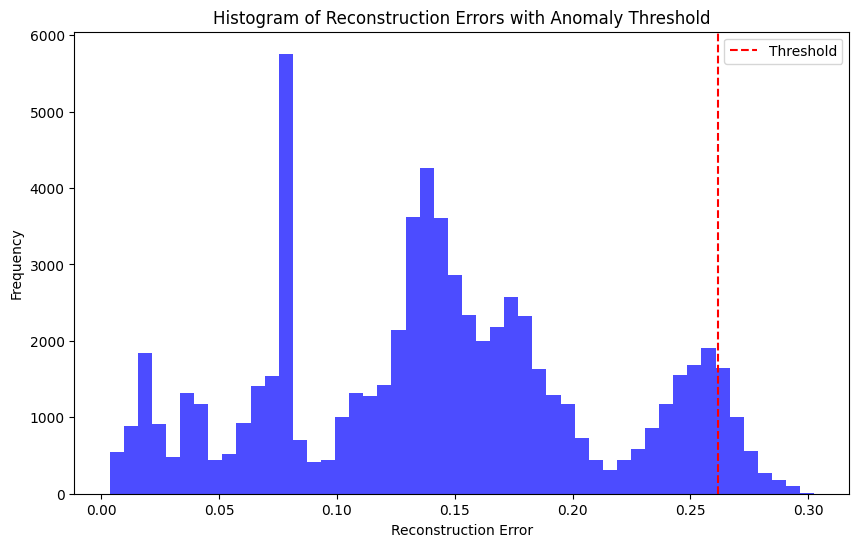

In [14]:
# Predict using the model
X_train_pred_lstm = model_lstm.predict(X_train_lstm)

# Calculate reconstruction error
train_mse_loss_lstm = np.mean(np.power(X_train_lstm - X_train_pred_lstm, 2), axis=(1, 2))

# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold_lstm = np.percentile(train_mse_loss_lstm, 95)

# Detect anomalies
anomalies_train_lstm = train_mse_loss_lstm > threshold_lstm
print(f"Anomaly detection threshold: {threshold_lstm}")
print(f"Number of anomalies detected: {np.sum(anomalies_train_lstm)}")

# Plot histogram of the reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(train_mse_loss_lstm, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold_lstm, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Reconstruction Errors with Anomaly Threshold')
plt.show()

#### Evaluate Your Model Against This True_Anomaly¶

In [15]:
# Adjust df_train_adjusted to match the length of your LSTM input.
df_train_adjusted_lstm = df_train.iloc[time_steps-1:].copy()

In [16]:
threshold_lstm = np.percentile(train_mse_loss_lstm, 95)  # 95th percentile threshold

df_train_adjusted_lstm['True_Anomaly'] = 0  # Initialize with 0 (no anomaly)
df_train_adjusted_lstm.loc[train_mse_loss_lstm > threshold_lstm, 'True_Anomaly'] = 1

In [17]:
#`anomalies_train_lstm` is model's predicted anomalies (1 for anomaly, 0 for normal)
precision = precision_score(df_train_adjusted_lstm['True_Anomaly'], anomalies_train_lstm)
recall = recall_score(df_train_adjusted_lstm['True_Anomaly'], anomalies_train_lstm)
f1 = f1_score(df_train_adjusted_lstm['True_Anomaly'], anomalies_train_lstm)
cm = confusion_matrix(df_train_adjusted_lstm['True_Anomaly'], anomalies_train_lstm)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[66302     0]
 [    0  3490]]


In [18]:
# Load the previously saved MinMaxScaler
scaler_minmax = joblib.load('scaler_minmax_df1.pkl')


# Initialize a dictionary to store the original boundary values for each feature
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

for feature in columns_to_transform:

    feature_index = columns_to_transform.index(feature)

    min_inlier_value_normalized = np.min(df_train_adjusted_lstm[feature])
    max_inlier_value_normalized = np.max(df_train_adjusted_lstm[feature])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): 23.0
Temperature - Max inlier value (original scale): 26.8125
Turbidity - Min inlier value (original scale): 1.0
Turbidity - Max inlier value (original scale): 100.0
Dissolved_Oxygen - Min inlier value (original scale): 0.008
Dissolved_Oxygen - Max inlier value (original scale): 41.04599999999999
pH - Min inlier value (original scale): 7.08996
pH - Max inlier value (original scale): 8.55167
Nitrate - Min inlier value (original scale): 45.0
Nitrate - Max inlier value (original scale): 1192.0
Ammonia - Min inlier value (original scale): 0.11094
Ammonia - Max inlier value (original scale): 427000000000.0
{'Temperature': {'min': 23.0, 'max': 26.8125}, 'Turbidity': {'min': 1.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.008, 'max': 41.04599999999999}, 'pH': {'min': 7.08996, 'max': 8.55167}, 'Nitrate': {'min': 45.0, 'max': 1192.0}, 'Ammonia': {'min': 0.11094, 'max': 427000000000.0}}


### Implementing the Evaluation on Test Data:

## Test Data

935/935 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step
Anomaly detection threshold: 0.2615411475300789
Number of anomalies detected in test data: 637


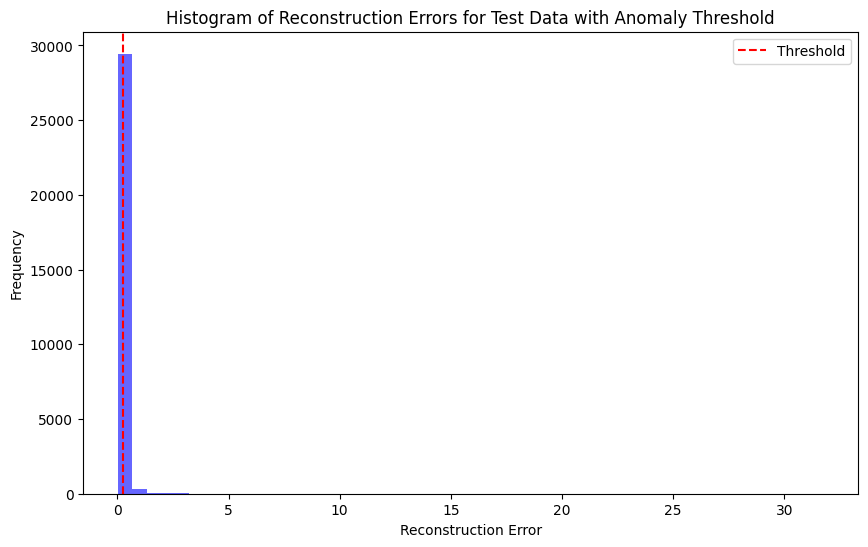

In [19]:
# Predict on the test data
X_test_pred_lstm = model_lstm.predict(X_test_lstm)


test_mse_loss_lstm = np.mean(np.power(X_test_lstm - X_test_pred_lstm, 2), axis=(1, 2))

test_anomalies_lstm = test_mse_loss_lstm > threshold_lstm
print(f"Anomaly detection threshold: {threshold_lstm}")
print(f"Number of anomalies detected in test data: {np.sum(test_anomalies_lstm)}")

plt.figure(figsize=(10, 6))
plt.hist(test_mse_loss_lstm, bins=50, color='blue', alpha=0.6)
plt.axvline(threshold_lstm, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors for Test Data with Anomaly Threshold')
plt.legend()
plt.show()

#### Check the model in test_dataset

In [20]:
df_test_adjusted_lstm = df_test.iloc[time_steps-1:].copy()

In [21]:
df_test_adjusted_lstm['True_Anomaly'] = 0  # Initialize with 0 (no anomaly)
df_test_adjusted_lstm.loc[test_mse_loss_lstm > threshold_lstm, 'True_Anomaly'] = 1

In [22]:
print("Columns in df_test_adjusted:", df_test_adjusted_lstm.columns)
if 'True_Anomaly' in df_test_adjusted_lstm.columns:
    print("True_Anomaly column found. Proceeding with evaluation.")
    precision = precision_score(df_test_adjusted_lstm['True_Anomaly'], test_anomalies_lstm)
    recall = recall_score(df_test_adjusted_lstm['True_Anomaly'], test_anomalies_lstm)
    f1 = f1_score(df_test_adjusted_lstm['True_Anomaly'], test_anomalies_lstm)
    cm = confusion_matrix(df_test_adjusted_lstm['True_Anomaly'], test_anomalies_lstm)

    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print("Test Confusion Matrix:")
    print(cm)
else:
    print("True_Anomaly column not found.")

Columns in df_test_adjusted: Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing', 'True_Anomaly'],
      dtype='object')
True_Anomaly column found. Proceeding with evaluation.
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000
Test Confusion Matrix:
[[29270     0]
 [    0   637]]


In [23]:
# Initialize a dictionary to store the original boundary values for each feature
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:
    
    # Extract the LSTM reconstruction errors or Isolation Forest prediction boundaries
    feature_index = columns_to_transform.index(feature)

    min_inlier_value_normalized = np.min(df_test_adjusted_lstm[feature])
    max_inlier_value_normalized = np.max(df_test_adjusted_lstm[feature])

    # Create a dummy array that matches the expected input shape for inverse_transform
    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    # Store the original boundary values in the dictionary
    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    # Print the original boundary values
    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): -127.00000000000001
Temperature - Max inlier value (original scale): 27.75
Turbidity - Min inlier value (original scale): 82.0
Turbidity - Max inlier value (original scale): 100.0
Dissolved_Oxygen - Min inlier value (original scale): 0.007
Dissolved_Oxygen - Max inlier value (original scale): 27.575
pH - Min inlier value (original scale): -0.5862699999999995
pH - Max inlier value (original scale): 7.657629612158515
Nitrate - Min inlier value (original scale): 331.4473292736611
Nitrate - Max inlier value (original scale): 1936.0000000000002
Ammonia - Min inlier value (original scale): 0.006769999999999978
Ammonia - Max inlier value (original scale): 258723495.09329236
{'Temperature': {'min': -127.00000000000001, 'max': 27.75}, 'Turbidity': {'min': 82.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.007, 'max': 27.575}, 'pH': {'min': -0.5862699999999995, 'max': 7.657629612158515}, 'Nitrate': {'min': 331.4473292736611, 'max': 1936.0000000000

### Plot Training and Validation Loss

Visualize the loss over epochs to understand how the model is learning:

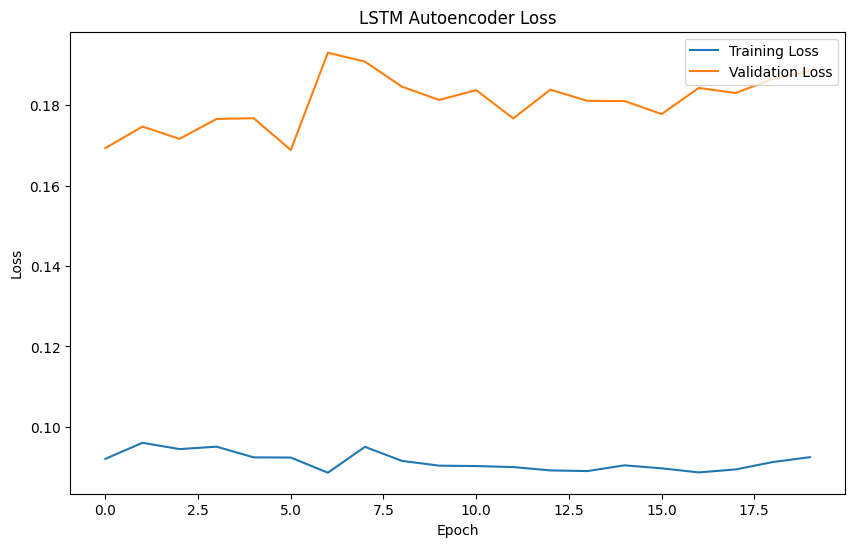

In [24]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Downsampled train data

73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


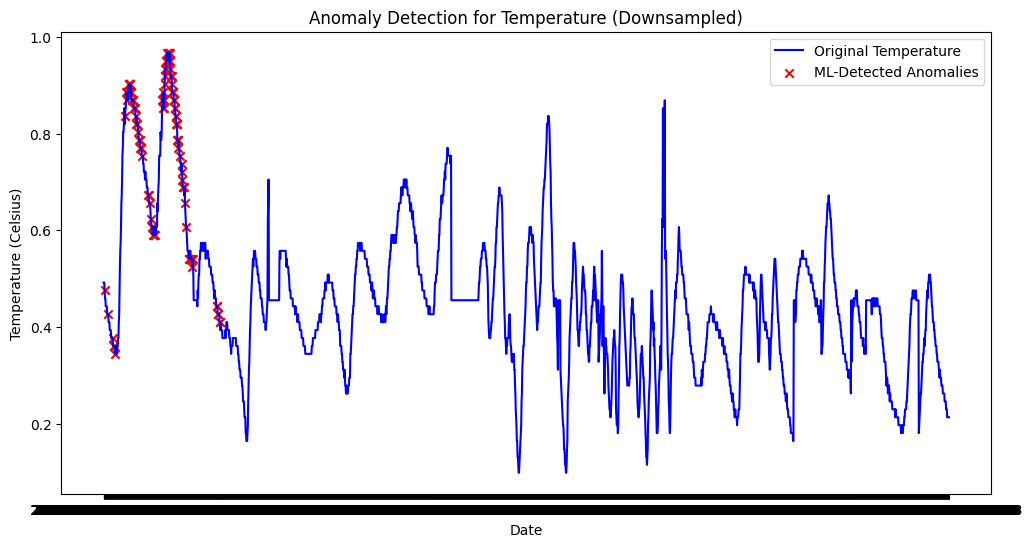

In [25]:
df_train_adjusted_downsampled_lstm = df_train_adjusted_lstm.iloc[::30].copy()

# Predict using the model on downsampled data
X_train_pred_downsampled_lstm = model_lstm.predict(X_train_lstm[::30])

# Calculate reconstruction error for downsampled data
train_mse_loss_downsampled_lstm = np.mean(np.power(X_train_lstm[::30] - X_train_pred_downsampled_lstm, 2), axis=(1, 2))

# Set a new threshold for downsampled data
threshold_downsampled_lstm = np.percentile(train_mse_loss_downsampled_lstm, 95)

# Detect anomalies on the downsampled data
anomalies_downsampled_lstm = train_mse_loss_downsampled_lstm > threshold_downsampled_lstm

# Update the anomalies column in the downsampled DataFrame
df_train_adjusted_downsampled_lstm['ML_Anomaly'] = anomalies_downsampled_lstm

# Plot anomalies on the downsampled original data
plt.figure(figsize=(12, 6))
plt.plot(df_train_adjusted_downsampled_lstm['Date'], df_train_adjusted_downsampled_lstm['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_train_adjusted_downsampled_lstm['Date'][anomalies_downsampled_lstm], df_train_adjusted_downsampled_lstm['Temperature'][anomalies_downsampled_lstm], color='red', label='ML-Detected Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Downsampled)')
plt.legend()
plt.show()

### Downsampling on test data

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


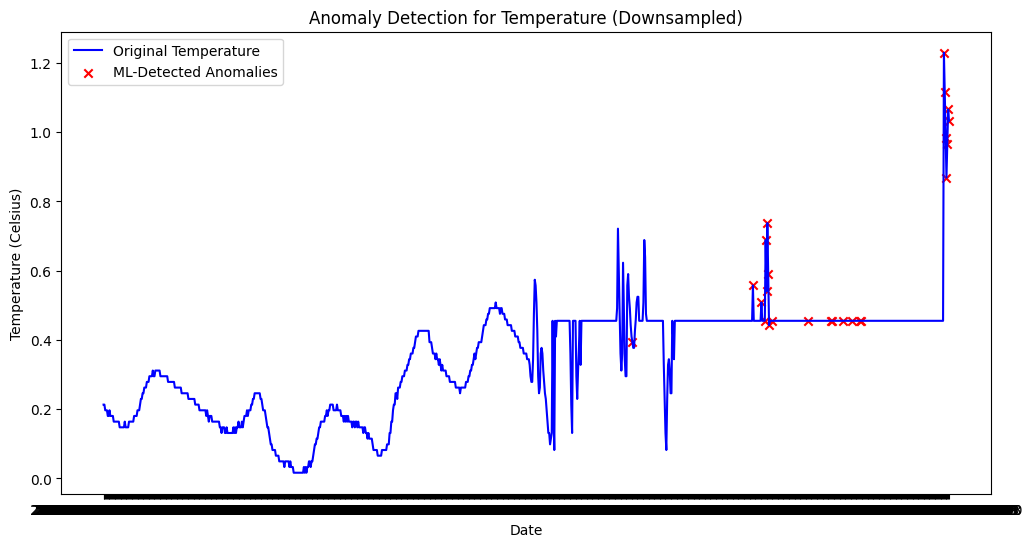

In [26]:
df_test_adjusted_downsampled_lstm = df_test_adjusted_lstm.iloc[::30].copy()

X_test_pred_downsampled_lstm = model_lstm.predict(X_test_lstm[::30])

test_mse_loss_downsampled_lstm = np.mean(np.power(X_test_lstm[::30] - X_test_pred_downsampled_lstm, 2), axis=(1, 2))

threshold_downsampled_lstm = np.percentile(train_mse_loss_downsampled_lstm, 95)

anomalies_downsampled_lstm = test_mse_loss_downsampled_lstm > threshold_downsampled_lstm

df_test_adjusted_downsampled_lstm['ML_Anomaly'] = anomalies_downsampled_lstm

# Plot anomalies on the downsampled original data
plt.figure(figsize=(12, 6))
plt.plot(df_test_adjusted_downsampled_lstm['Date'], df_test_adjusted_downsampled_lstm['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_test_adjusted_downsampled_lstm['Date'][anomalies_downsampled_lstm], df_test_adjusted_downsampled_lstm['Temperature'][anomalies_downsampled_lstm], color='red', label='ML-Detected Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Downsampled)')
plt.legend()
plt.show()

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step
Hybrid Model Precision (Train): 0.5990
Hybrid Model Recall (Train): 1.0000
Hybrid Model F1 Score (Train): 0.7492
Confusion Matrix (Hybrid Model - Train):
[[63966  2336]
 [    0  3490]]


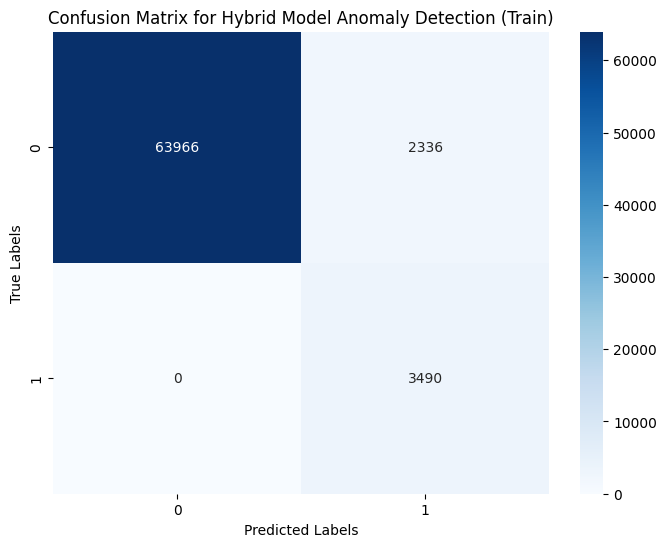

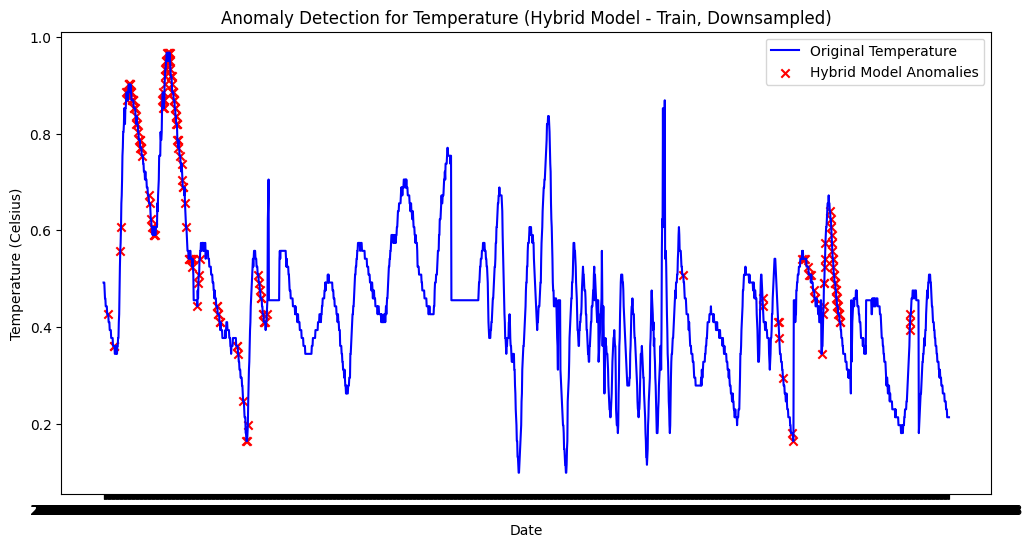

In [27]:
X_train_pred_lstm = model_lstm.predict(X_train_lstm)

train_mse_loss_lstm = np.mean(np.power(X_train_lstm - X_train_pred_lstm, 2), axis=(1, 2))

threshold_lstm_train = np.percentile(train_mse_loss_lstm, 95)
anomalies_lstm_train = train_mse_loss_lstm > threshold_lstm_train

df_train_adjusted_lstm['LSTM_Anomaly'] = anomalies_lstm_train.astype(int)

isolation_model_lstm_train = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels_iforest_train = isolation_model_lstm_train.fit_predict(train_mse_loss_lstm.reshape(-1, 1))

# Convert -1 (outlier) to 1 and 1 (inlier) to 0 for consistency
anomaly_labels_iforest_train = np.where(anomaly_labels_iforest_train == -1, 1, 0)

df_train_adjusted_lstm['Hybrid_Anomaly'] = np.maximum(df_train_adjusted_lstm['LSTM_Anomaly'], anomaly_labels_iforest_train)

precision_hybrid_train = precision_score(df_train_adjusted_lstm['True_Anomaly'], df_train_adjusted_lstm['Hybrid_Anomaly'])
recall_hybrid_train = recall_score(df_train_adjusted_lstm['True_Anomaly'], df_train_adjusted_lstm['Hybrid_Anomaly'])
f1_hybrid_train = f1_score(df_train_adjusted_lstm['True_Anomaly'], df_train_adjusted_lstm['Hybrid_Anomaly'])
cm_hybrid_train = confusion_matrix(df_train_adjusted_lstm['True_Anomaly'], df_train_adjusted_lstm['Hybrid_Anomaly'])

print(f"Hybrid Model Precision (Train): {precision_hybrid_train:.4f}")
print(f"Hybrid Model Recall (Train): {recall_hybrid_train:.4f}")
print(f"Hybrid Model F1 Score (Train): {f1_hybrid_train:.4f}")
print("Confusion Matrix (Hybrid Model - Train):")
print(cm_hybrid_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Model Anomaly Detection (Train)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

df_train_adjusted_downsampled = df_train_adjusted_lstm.iloc[::30].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_train_adjusted_downsampled['Date'], df_train_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_train_adjusted_downsampled['Date'][df_train_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            df_train_adjusted_downsampled['Temperature'][df_train_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            color='red', label='Hybrid Model Anomalies', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Hybrid Model - Train, Downsampled)')
plt.legend()
plt.show()

### Inverse Transform to Get Original Scale

In [29]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

for feature in columns_to_transform:
    
    feature_index = columns_to_transform.index(feature)
    
    min_anomaly_value_normalized = np.min(df_train_adjusted_lstm[feature][df_train_adjusted_lstm['Hybrid_Anomaly'] == 1])
    max_anomaly_value_normalized = np.max(df_train_adjusted_lstm[feature][df_train_adjusted_lstm['Hybrid_Anomaly'] == 1])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_anomaly_value_normalized
    min_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    dummy_array[0, feature_index] = max_anomaly_value_normalized
    max_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_anomaly_value_original, 'max': max_anomaly_value_original}

    print(f"{feature} - Min anomaly value (original scale): {min_anomaly_value_original}")
    print(f"{feature} - Max anomaly value (original scale): {max_anomaly_value_original}")

print(original_boundary_values)

Temperature - Min anomaly value (original scale): 23.625
Temperature - Max anomaly value (original scale): 26.8125
Turbidity - Min anomaly value (original scale): 8.999999999999998
Turbidity - Max anomaly value (original scale): 100.0
Dissolved_Oxygen - Min anomaly value (original scale): 0.024999999999999852
Dissolved_Oxygen - Max anomaly value (original scale): 40.868
pH - Min anomaly value (original scale): 7.11266
pH - Max anomaly value (original scale): 8.55167
Nitrate - Min anomaly value (original scale): 118.99999999999993
Nitrate - Max anomaly value (original scale): 873.0
Ammonia - Min anomaly value (original scale): 0.22656999999999997
Ammonia - Max anomaly value (original scale): 4787283967.999991
{'Temperature': {'min': 23.625, 'max': 26.8125}, 'Turbidity': {'min': 8.999999999999998, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.024999999999999852, 'max': 40.868}, 'pH': {'min': 7.11266, 'max': 8.55167}, 'Nitrate': {'min': 118.99999999999993, 'max': 873.0}, 'Ammonia': {'min':

## Apply the Train Thresholds and Models to the Test Dataset

Now that you have the threshold from the training dataset, you can apply the same process to the test dataset:

935/935 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step
Hybrid Model Precision (Test): 0.4258
Hybrid Model Recall (Test): 1.0000
Hybrid Model F1 Score (Test): 0.5973
Confusion Matrix (Hybrid Model - Test):
[[28411   859]
 [    0   637]]


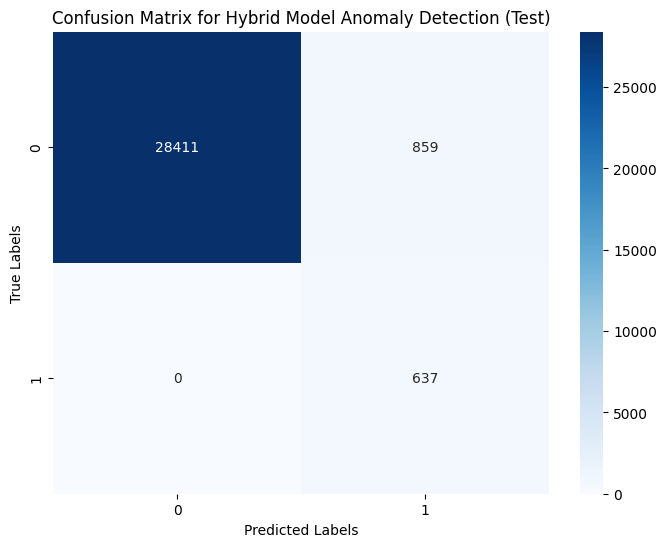

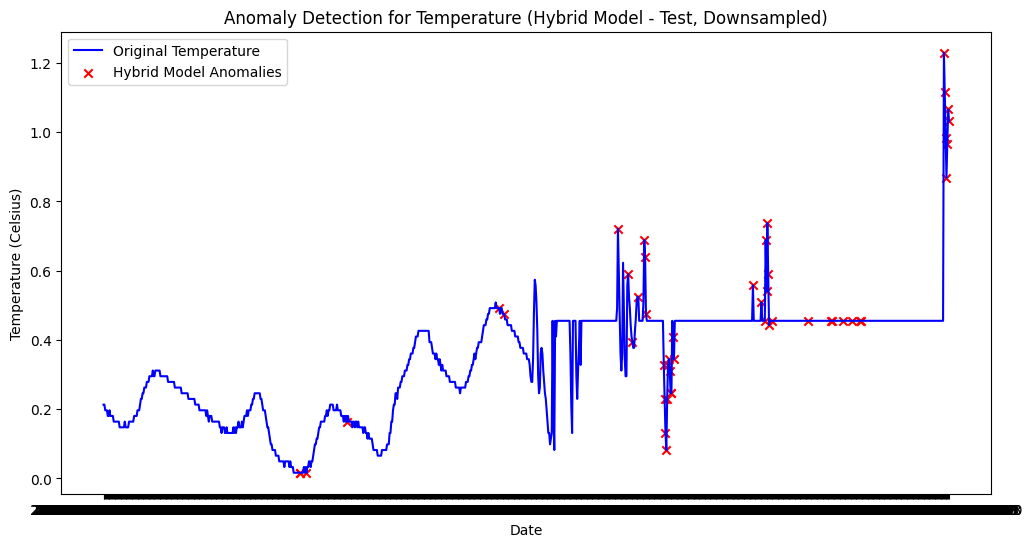

In [30]:
X_test_pred_lstm = model_lstm.predict(X_test_lstm)

test_mse_loss_lstm = np.mean(np.power(X_test_lstm - X_test_pred_lstm, 2), axis=(1, 2))

threshold_lstm_test = np.percentile(test_mse_loss_lstm, 95)  
anomalies_lstm_test = test_mse_loss_lstm > threshold_lstm_test

df_test_adjusted_lstm['LSTM_Anomaly'] = anomalies_lstm_test.astype(int)

anomaly_labels_iforest_test = isolation_model_lstm_train.predict(test_mse_loss_lstm.reshape(-1, 1))

# Convert -1 (outlier) to 1 and 1 (inlier) to 0 for consistency
anomaly_labels_iforest_test = np.where(anomaly_labels_iforest_test == -1, 1, 0)

df_test_adjusted_lstm['Hybrid_Anomaly'] = np.maximum(df_test_adjusted_lstm['LSTM_Anomaly'], anomaly_labels_iforest_test)

for feature in columns_to_transform:
    min_boundary = original_boundary_values[feature]['min']
    max_boundary = original_boundary_values[feature]['max']

    df_test_adjusted_lstm[f'{feature}_Anomaly_Check'] = (
        (df_test_adjusted_lstm[feature] < min_boundary) |
        (df_test_adjusted_lstm[feature] > max_boundary)
    ).astype(int)

precision_hybrid_test = precision_score(df_test_adjusted_lstm['True_Anomaly'], df_test_adjusted_lstm['Hybrid_Anomaly'])
recall_hybrid_test = recall_score(df_test_adjusted_lstm['True_Anomaly'], df_test_adjusted_lstm['Hybrid_Anomaly'])
f1_hybrid_test = f1_score(df_test_adjusted_lstm['True_Anomaly'], df_test_adjusted_lstm['Hybrid_Anomaly'])
cm_hybrid_test = confusion_matrix(df_test_adjusted_lstm['True_Anomaly'], df_test_adjusted_lstm['Hybrid_Anomaly'])

print(f"Hybrid Model Precision (Test): {precision_hybrid_test:.4f}")
print(f"Hybrid Model Recall (Test): {recall_hybrid_test:.4f}")
print(f"Hybrid Model F1 Score (Test): {f1_hybrid_test:.4f}")
print("Confusion Matrix (Hybrid Model - Test):")
print(cm_hybrid_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Model Anomaly Detection (Test)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

df_test_adjusted_downsampled = df_test_adjusted_lstm.iloc[::30].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_test_adjusted_downsampled['Date'], df_test_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_test_adjusted_downsampled['Date'][df_test_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            df_test_adjusted_downsampled['Temperature'][df_test_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            color='red', label='Hybrid Model Anomalies', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Hybrid Model - Test, Downsampled)')
plt.legend()
plt.show()

In [31]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:

    feature_index = columns_to_transform.index(feature)

    min_anomaly_value_normalized = np.min(df_test_adjusted_lstm[feature][df_test_adjusted_lstm['Hybrid_Anomaly'] == 1])
    max_anomaly_value_normalized = np.max(df_test_adjusted_lstm[feature][df_test_adjusted_lstm['Hybrid_Anomaly'] == 1])
    
    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    # Print the original boundary values
    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): 22.99999999999907
Temperature - Max inlier value (original scale): 23.0023100312052
Turbidity - Min inlier value (original scale): 0.9999999999758482
Turbidity - Max inlier value (original scale): 1.0599850726071653
Dissolved_Oxygen - Min inlier value (original scale): 0.007999999989988458
Dissolved_Oxygen - Max inlier value (original scale): 0.03286532737023076
pH - Min inlier value (original scale): 7.0899599999996425
pH - Max inlier value (original scale): 7.090845664449298
Nitrate - Min inlier value (original scale): 44.99999999972018
Nitrate - Max inlier value (original scale): 45.69497856848908
Ammonia - Min inlier value (original scale): 0.006769999999999978
Ammonia - Max inlier value (original scale): 258723495.09329236
{'Temperature': {'min': 22.99999999999907, 'max': 23.0023100312052}, 'Turbidity': {'min': 0.9999999999758482, 'max': 1.0599850726071653}, 'Dissolved_Oxygen': {'min': 0.007999999989988458, 'max': 0.0328653273702307

#### Save the Model

In [32]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

# Save the model
model_lstm.save('lstm_model_df1.h5')

#### Load the model

In [33]:
model_lstm = load_model('lstm_model_df1.h5', custom_objects={'MeanAbsoluteError': MeanAbsoluteError})

In [34]:
split_index = int(0.9 * X_train_lstm.shape[0])
X_val_lstm = X_train_lstm[split_index:]
X_train_lstm_actual = X_train_lstm[:split_index]

# Recalculate validation predictions
X_val_pred = model_lstm.predict(X_val_lstm)

# Calculate MSE for validation and test datasets
val_mse_loss_lstm = mean_squared_error(X_val_lstm.reshape(-1, X_val_lstm.shape[2]), X_val_pred.reshape(-1, X_val_pred.shape[2]))
test_mse_loss_lstm = mean_squared_error(X_test_lstm.reshape(-1, X_test_lstm.shape[2]), X_test_pred_lstm.reshape(-1, X_test_pred_lstm.shape[2]))

# Store the results in a dictionary
model_results_lstm = {
    'LSTM': {
        'Validation MSE': val_mse_loss_lstm,
        'Test MSE': test_mse_loss_lstm
    }
}

# Print the results
print("Validation MSE:", val_mse_loss_lstm)
print("Test MSE:", test_mse_loss_lstm)

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
Validation MSE: 0.070671864
Test MSE: 0.11729072


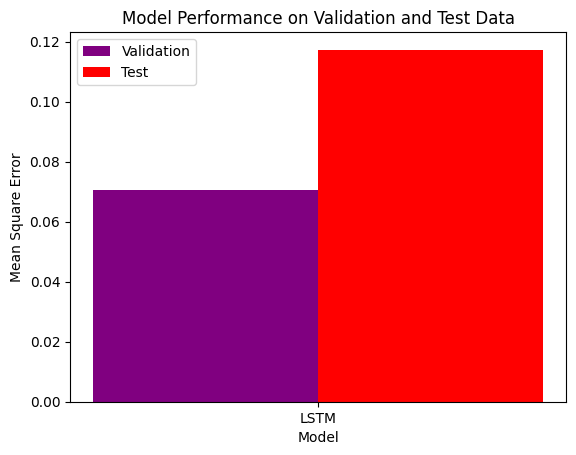

In [35]:
model_names = list(model_results_lstm.keys())
validation_mse = [model_results_lstm[name]['Validation MSE'] for name in model_names]
test_mse = [model_results_lstm[name]['Test MSE'] for name in model_names]

# Plotting the bar chart
fig, ax = plt.subplots()

index = np.arange(len(model_names))
bar_width = 0.35

bars1 = ax.bar(index, validation_mse, bar_width, label='Validation', color='purple')
bars2 = ax.bar(index + bar_width, test_mse, bar_width, label='Test', color='red')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Square Error')
ax.set_title('Model Performance on Validation and Test Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

In [36]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

model_lstm.save('lstm_model_df1.h5')